In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import matplotlib as mpl

In [50]:
# Load the data from the Excel file
file_path = 'coba_olah.xlsx'  # Replace with your file path
sheet_name = "1 5 7 0 1"
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Assuming 'x' and 'y' are the column names in your Excel file
x = data['Acceleration voltage U_B / V']
y = data['Collector current I_A / nA']

In [51]:
# al the functions
# function to find average of flat peak
def avg_peak(x, y, peak):
    flat_peak = [x[peak]]
    
    #check backward
    i=1
    while(y[peak-i] == y[peak]):
        flat_peak.append(x[peak-i])
        i+=1
    
    #check forward
    i=1
    while(y[peak+i] == y[peak]):
        flat_peak.append(x[peak+i])
        i+=1
    
    return sum(flat_peak)/len(flat_peak)

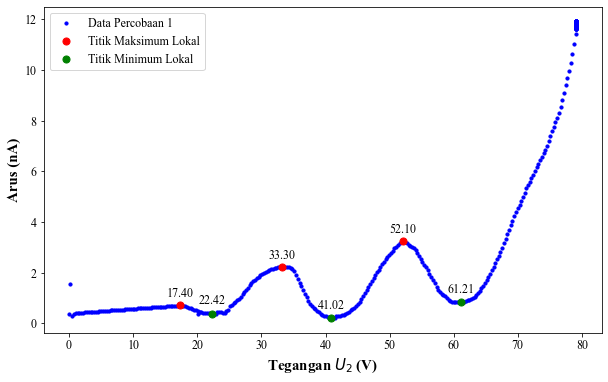

In [60]:
# Find local peaks in the y data
peaks, _ = find_peaks(y,distance=30)

# Filter out the first and last peaks
filtered_peaks = [p for p in peaks if x[p] not in [x[peaks[0]], x[peaks[-1]], 60.25]]

# Find local minima by finding peaks in the negative y data
minima, _ = find_peaks(-y, distance=30)

# Filter out specific minima points (e.g., 0.45 and 79.10)
filtered_minima = [m for m in minima if x[m] not in [0.45, 79.10]]

# Set the font to Times New Roman
mpl.rcParams['font.family'] = 'Times New Roman'

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Data Percobaan 1', color='blue', s=10)
plt.scatter(x[filtered_peaks], y[filtered_peaks], color='red', label='Titik Maksimum Lokal', s=50)  # Marking peaks
plt.scatter(x[filtered_minima], y[filtered_minima], color='green', label='Titik Minimum Lokal', s=50)  # Marking minima

# Annotate each peak with its x-coordinate
for peak in filtered_peaks:
    x_peak_avg = avg_peak(x, y, peak)
    plt.annotate(f"{x_peak_avg:.2f}", (x[peak], y[peak]), textcoords="offset points", xytext=(0,9), ha='center', fontsize=12)

# Annotate each minimum point with its x-coordinate
for min_point in filtered_minima:
    x_min_avg = avg_peak(x, y, min_point)
    plt.annotate(f"{x_min_avg:.2f}", (x[min_point], y[min_point]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=12)

# plt.ylim(0,1.5)
plt.xlabel('Tegangan $U_{2}$ (V)', fontsize=15, fontweight='bold')
plt.ylabel('Arus (nA)', fontsize=15, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

# Save the figure with high resolution
plt.savefig('high_quality_plot.png', dpi=300, bbox_inches='tight')  # Adjust dpi as needed
plt.show()